# Exploring Stock Market Data

This notebook provides step-by-step instructions for replicating what Brian did in the third demo, to analyze Apple's stock closing prices between October 24, 2024 and October 23, 2025. 

Please follow along, and feel free to play with different variations too! 

## Step 1: Define the Dates and Ticker Variables

These variables will be used at the end to generate a summary of the insights.

In [1]:
start_date = '2024-10-24'
end_date = '2025-10-23'
ticker = 'AAPL'

## Step 2: Download Apple Stock Data

- Open Jupyter chat by clicking on the chat bubble icon on the left sidebar of Jupyter Lab
- Create a new chat by clicking `+Chat` (choose any name for the file)
- In the chat window, attach the Markdown file `yfinance_docs.md` using the `@` symbol
  - Type `@`, then select `file` from the autocomplete menu
  - You'll see a list of available files in the lesson's directory, choose `yfinance_docs.md` 
- To download Apple stock data, use a prompt like this:
   > Use yfinance to download Apple (AAPL) stock data for this period:
   > - start date: October 24, 2024
   > - end date: October 23, 2025
   >
   > Save the returned results in a DataFrame called `aapl`
- Transfer the generated code to the cell below and run it

In [2]:
import yfinance as yf

# Download Apple stock data for the specified period
aapl = yf.download('AAPL', start='2024-10-24', end='2025-10-23')

# Display the first few rows
aapl.head()

/usr/local/lib/python3.11/site-packages/yfinance/multi.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  original_output = yfinance_original_download(
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
Use cached data instead due to an error downloading data


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-10-24,229.501907,229.750749,227.351910,228.914629,31109500
2024-10-25,230.338013,232.139626,228.506540,228.675751,38802300
2024-10-28,232.318787,233.642627,231.472733,232.239171,36087100
2024-10-29,232.587540,233.244486,231.243803,232.020188,35417200
2024-10-30,229.034088,232.388472,228.486633,231.532455,47070900


<span style="color:green; font-weight:bold;">Note:</span> If you see a message saying that cached data was used due to rate limit errors, this is a temporary issue in this learning environment that occurs when too many requests are sent simultaneously. You can run the notebook locally if you wish to download data for different stocks.

- Print the columns of the DataFrame `aapl`: `aapl.columns`

- In the chat window, ask how you can flatten the columns of the DataFrame using a prompt like this:
  > The DataFrame aapl has multiIndexed columns [('Close','AAPL'),('High','AAPL'),('Low','AAPL'),('Open','AAPL'),('Volume','AAPL')]. Flatten the columns by removing 'AAPL'.

In [4]:
import yfinance as yf

# Download Apple stock data for the specified period
aapl = yf.download('AAPL', start='2024-10-24', end='2025-10-23')

# Display the first few rows
aapl.head()

/usr/local/lib/python3.11/site-packages/yfinance/multi.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  original_output = yfinance_original_download(
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
Use cached data instead due to an error downloading data


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-10-24,229.501907,229.750749,227.351910,228.914629,31109500
2024-10-25,230.338013,232.139626,228.506540,228.675751,38802300
2024-10-28,232.318787,233.642627,231.472733,232.239171,36087100
2024-10-29,232.587540,233.244486,231.243803,232.020188,35417200
2024-10-30,229.034088,232.388472,228.486633,231.532455,47070900


## Step 3: Calculate Basic Statistics & Metrics

- In the same chat window, use a prompt like this to calculate the basic descriptive statistics of the DataFrame:
  > Display the shape and statistical summary of the DataFrame aapl.

In [5]:
# Display the shape of the DataFrame
print("Shape of aapl:", aapl.shape)

# Display the statistical summary
aapl.describe()

Shape of aapl: (249, 5)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,224.957396,227.273417,222.369993,224.635081,5.421537e+07
std,18.868477,18.431105,19.040953,18.838291,2.333789e+07
min,171.998993,189.875235,168.796839,171.530131,2.323470e+07
25%,209.771927,211.721759,207.484525,209.692012,4.012770e+07
50%,227.094116,229.300003,224.690002,226.366414,4.722760e+07
75%,238.742462,241.320007,236.370912,238.970001,5.736570e+07
max,262.769989,265.290009,261.829987,262.649994,1.843959e+08


- To calculate the total return, use a prompt like this:
  > Use the Close column of DataFrame aapl to find the total return in percentage (`total_return`) based on the start price and end price.

In [7]:
# Calculate total return in percentage
start_price = aapl['Close'].iloc[0]
end_price = aapl['Close'].iloc[-1]

total_return = ((end_price - start_price) / start_price) * 100

print(f"Total return: {total_return:}%")

Total return: Ticker
AAPL    12.613448
dtype: float64%


## Step 4: Visualize the Closing Price

- To visualize Apple's Closing price, use a prompt like this:
  > Create a line chart showing the closing price trend using the column 'Close' of the DataFrame `aapl`.
  >
  > Use matplotlib to create a professional-looking chart with:
  > - Clear title and axis labels
  > - Grid for readability
  > - Appropriate colors and styling

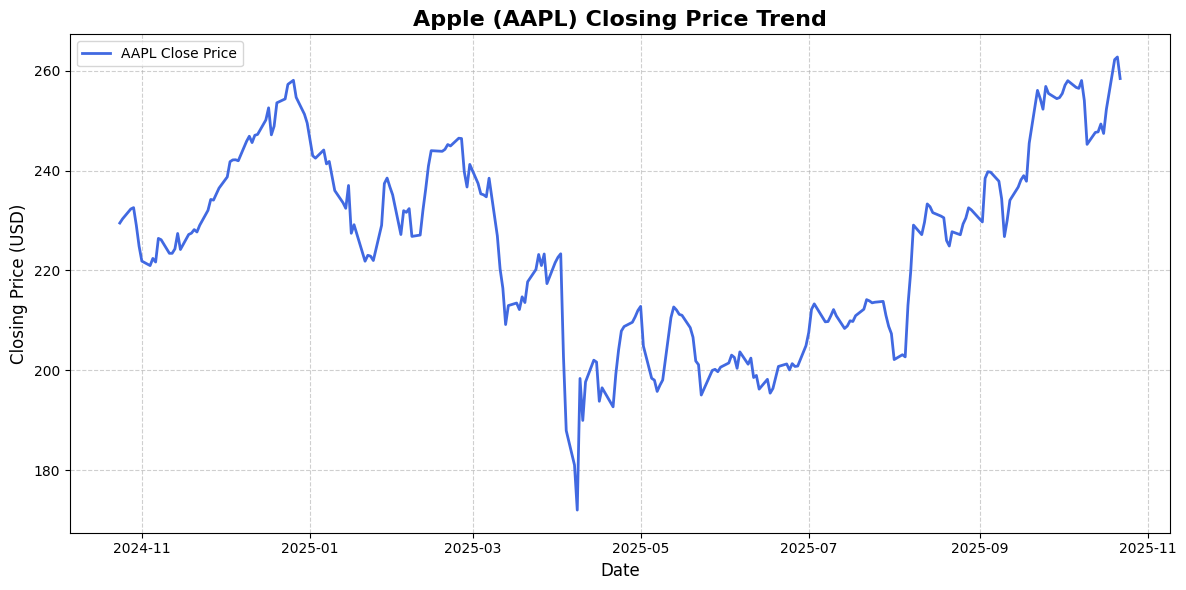

In [8]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the 'Close' column
plt.plot(aapl['Close'], color='royalblue', linewidth=2, label='AAPL Close Price')

# Add title and axis labels
plt.title('Apple (AAPL) Closing Price Trend', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend()

# Use tight layout for better spacing
plt.tight_layout()

# Display the chart
plt.show()

- To find the dates that correspond to the peak and lowest prices, use a prompt like this:
  > Use the Close column of aapl dataFrame to find and print:
  > - the peak date (in a variable called `peak_date`) that corresponds to the maximum closing price `peak_price`
  > - the lowest date (in a variable called `lowest_date`) that corresponds to the minimum closing price `lowest_price`
  >
  > Update the above code to show the peak and low prices in the line chart.

/tmp/ipykernel_38/3864055483.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Peak date: {peak_date}, Peak price: {peak_price[0]:.2f}")
/tmp/ipykernel_38/3864055483.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Lowest date: {lowest_date}, Lowest price: {lowest_price[0]:.2f}")
/tmp/ipykernel_38/3864055483.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(f'Peak: {peak_price[0]:2f}',


Peak date: Ticker
AAPL   2025-10-21
dtype: datetime64[ns], Peak price: 262.77
Lowest date: Ticker
AAPL   2025-04-08
dtype: datetime64[ns], Lowest price: 172.00


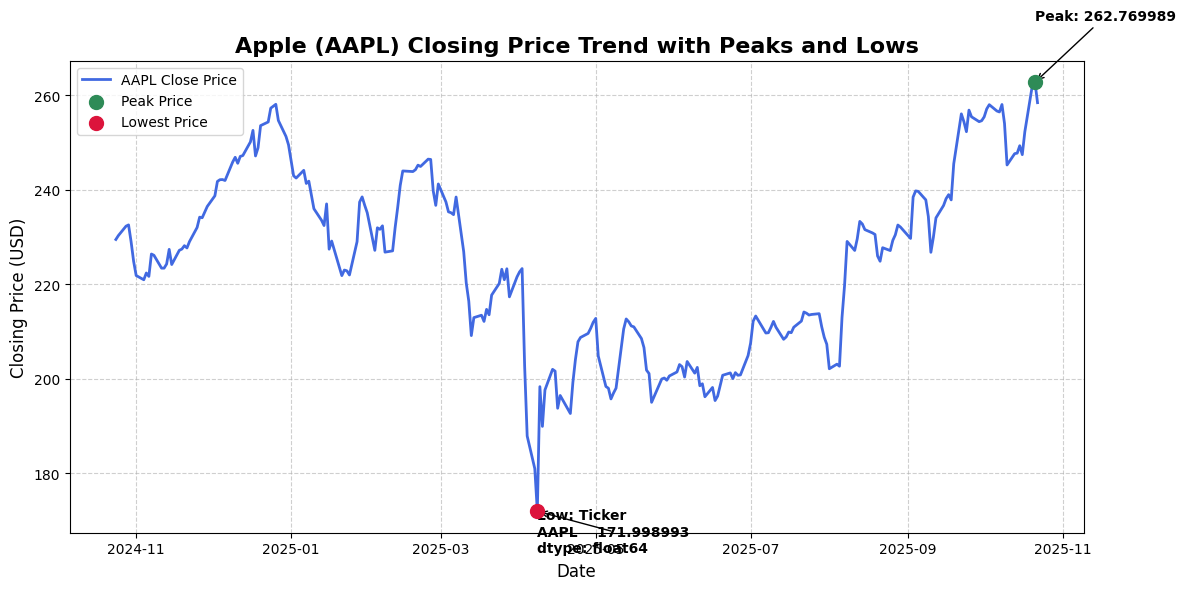

In [15]:
import matplotlib.pyplot as plt

# Find peak and lowest closing prices
peak_price = aapl['Close'].max()
lowest_price = aapl['Close'].min()

# Find corresponding dates
peak_date = aapl['Close'].idxmax()
lowest_date = aapl['Close'].idxmin()

print(f"Peak date: {peak_date}, Peak price: {peak_price[0]:.2f}")
print(f"Lowest date: {lowest_date}, Lowest price: {lowest_price[0]:.2f}")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the closing price trend
plt.plot(aapl['Close'], color='royalblue', linewidth=2, label='AAPL Close Price')

# Highlight peak and lowest points
plt.scatter(peak_date, peak_price, color='seagreen', s=100, zorder=5, label='Peak Price')
plt.scatter(lowest_date, lowest_price, color='crimson', s=100, zorder=5, label='Lowest Price')

# Annotate the points
plt.annotate(f'Peak: {peak_price[0]:2f}', 
             xy=(peak_date, peak_price),
             xytext=(peak_date, peak_price * 1.05),
             arrowprops=dict(facecolor='seagreen', arrowstyle='->'),
             fontsize=10, fontweight='bold')

plt.annotate(f'Low: {lowest_price}', 
             xy=(lowest_date, lowest_price),
             xytext=(lowest_date, lowest_price * 0.95),
             arrowprops=dict(facecolor='crimson', arrowstyle='->'),
             fontsize=10, fontweight='bold')

# Add title, labels, and grid
plt.title('Apple (AAPL) Closing Price Trend with Peaks and Lows', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()

- To find the context related to the peak and lowest date, use a prompt like this:
  > For the `peak_date` and `lowest_date`, search for related Apple news using Serper. The Serper API key is saved in a .env file. Store the snippets of the found articles in a json string `news_snippets` that has these fields: peak_date, lowest_date, peak_news_snippets, lowest_news_snippets.

<span style="color:green; font-weight:bold;">Note:</span> The `SERPER_API_KEY` variable is already defined in this environment, you do not need to create  an `.env` file. 

In [17]:
import os
import json
from dotenv import load_dotenv
import requests

# Load API key from .env file
load_dotenv()
SERPER_API_KEY = os.getenv("SERPER_API_KEY")

# Confirm key is loaded
if not SERPER_API_KEY:
    raise ValueError("Serper API key not found in .env file.")

# Build the search query with the peak and lowest dates
def fetch_news_snippets(query):
    """Fetch search results using Serper.dev API"""
    url = "https://google.serper.dev/news"
    headers = {"X-API-KEY": SERPER_API_KEY, "Content-Type": "application/json"}
    payload = {"q": query}
    
    response = requests.post(url, headers=headers, json=payload)
    response.raise_for_status()
    results = response.json().get("news", [])
    
    # Extract short snippets from results
    snippets = [article.get("snippet", "") for article in results if "snippet" in article]
    return snippets

# Example: use previously computed peak and lowest dates
# (assuming peak_date and lowest_date are datetime-like objects)
peak_query = f"Apple stock news {peak_date[0].strftime('%Y-%m-%d')}"
lowest_query = f"Apple stock news {lowest_date[0].strftime('%Y-%m-%d')}"

# Fetch snippets
peak_news_snippets = fetch_news_snippets(peak_query)
lowest_news_snippets = fetch_news_snippets(lowest_query)

# Build JSON result
news_snippets = json.dumps({
    "peak_date": str(peak_date),
    "lowest_date": str(lowest_date),
    "peak_news_snippets": peak_news_snippets,
    "lowest_news_snippets": lowest_news_snippets
}, indent=2)

# Print the JSON string
print(news_snippets)

/tmp/ipykernel_38/2487158480.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  peak_query = f"Apple stock news {peak_date[0].strftime('%Y-%m-%d')}"
/tmp/ipykernel_38/2487158480.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lowest_query = f"Apple stock news {lowest_date[0].strftime('%Y-%m-%d')}"


{
  "peak_date": "Ticker\nAAPL   2025-10-21\ndtype: datetime64[ns]",
  "lowest_date": "Ticker\nAAPL   2025-04-08\ndtype: datetime64[ns]",
  "peak_news_snippets": [
    "Stocks rose to begin a busy week that will see a flurry of corporate earnings reports, with investors also awaiting further developments on...",
    "Wall Street closed higher on Monday, driven by tech and financial stocks. Investors showed less apprehension about the regional bank credit...",
    "The Dow hit its 12th record of 2025 on Tuesday, while the S&P 500 was flat and the Nasdaq fell as earnings reports delivered.",
    "The S&P 500 is nearing another record, but some analysts caution that a host of factors may stall its momentum.",
    "We just received data on a new analyst forecast for $AAPL. JP Morgan gave a rating of 'Overweight' f.",
    "News of brisk sales of the iPhone 17 boosted Apple stock. So did Jim Cramer's comments about the company's strong brand and promising...",
    "Two technology titans, Mic

## Step 5: Analyze Volatility

- To calculate the signal's volatility, use a prompt like this: 
  >In the DataFrame aapl, find the overall volatility in percentage using the column Close. Volatility is the standard deviation of the daily percentage changes. Save the result in a variable called `volatility`.

In [23]:
# Calculate daily percentage changes
daily_pct_change = aapl['Close'].pct_change()

# Compute volatility as the standard deviation of daily percentage changes (in percentage)
volatility = daily_pct_change.std() * 100

print(f"Overall volatility: {volatility[0]:.2f}%")

Overall volatility: 2.07%


/tmp/ipykernel_38/3820625859.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Overall volatility: {volatility[0]:.2f}%")


- To find and plot the rolling volatility, use a prompt like this:
  > Calculate the rolling volatility as the as 20-day standard deviation of the daily percentage change and plot it. Identify days of high volatility where volatility is greater than mean + std. Save the days of high volatility in a DataFrame called `high_vol_days`.

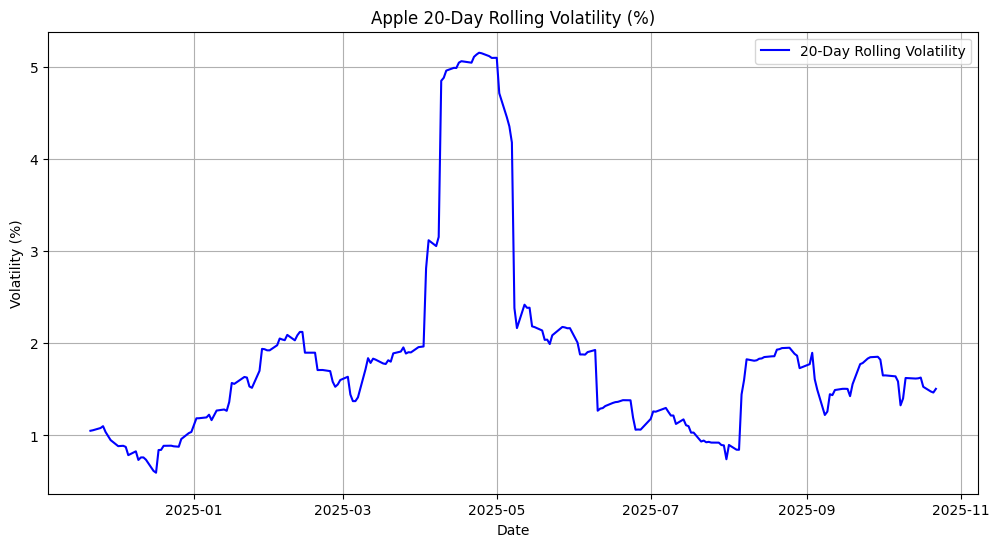

Price,Close,High,Low,Open,Volume,Rolling_Volatility
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2025-04-04,187.920029,199.391949,186.882560,193.416569,125910900,3.118729
2025-04-07,181.016922,193.675923,174.193612,176.767314,160466300,3.055581
2025-04-08,171.998993,189.875235,168.796839,186.244124,120859500,3.154230
2025-04-09,198.364456,200.120153,171.470280,171.530131,184395900,4.848774
2025-04-10,189.955048,194.304402,182.553167,188.608353,121880000,4.881460


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate daily percentage change
daily_pct_change = aapl['Close'].pct_change()

# Compute 20-day rolling volatility (standard deviation of daily % changes, in percentage)
aapl['Rolling_Volatility'] = daily_pct_change.rolling(window=20).std() * 100

# Plot the rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(aapl.index, aapl['Rolling_Volatility'], label='20-Day Rolling Volatility', color='blue')
plt.title("Apple 20-Day Rolling Volatility (%)")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.legend()
plt.grid(True)
plt.show()

# Calculate thresholds for high volatility days
mean_vol = aapl['Rolling_Volatility'].mean()
std_vol = aapl['Rolling_Volatility'].std()
threshold = mean_vol + std_vol

# Identify high volatility days
high_vol_days = aapl[aapl['Rolling_Volatility'] > threshold]

# Display the high volatility days DataFrame
high_vol_days.head()

## Step 6: Report Generation

- To generate a report summarizing the insights, use a prompt like this:
  
  > Use gpt-4.1-mini to generate a summary that takes in these variables:
  > - ticker: stock ticker (string)
  > - start_date: analysis starting period (string)
  > - end_date: analysis end period (string)
  > - numerical metrics: total_return & volatility (in percentage)
  > - peak_date, peak_price
  > - lowest_date, lowest_price
  > - high_vol_days: pandas DataFrame showing high volatility days
  > - news_snippets: string containing snippet of news for the peak and lowest dates
  >
  > The OpenAI API key is stored in the .env file. The variables are already defined in the notebook.

In [26]:
from openai import OpenAI
from dotenv import load_dotenv
import os

# Load the API key from .env file
load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Prepare a prompt template using your defined variables
prompt = f"""
You are a financial analyst assistant. Write a concise summary of a stock analysis report.

Ticker: {ticker}
Analysis period: {start_date} to {end_date}

Metrics:
- Total Return: {total_return[0]:.2f}%
- Volatility: {volatility[0]:.2f}%

Peak Information:
- Date: {peak_date}
- Price: {peak_price}

Lowest Information:
- Date: {lowest_date}
- Price: {lowest_price}

High Volatility Days:
{high_vol_days[['Close', 'Rolling_Volatility']].head().to_string(index=False)}

News Snippets:
{news_snippets}

Generate a professional summary paragraph that highlights:
- The stock’s performance and volatility,
- The most volatile periods,
- The context from related news events.
"""

# Call GPT-4.1-mini to generate the summary
response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[
        {"role": "system", "content": "You are a financial report summarizer."},
        {"role": "user", "content": prompt}
    ]
)

# Extract and display the summary
summary = response.choices[0].message.content
print(summary)

/tmp/ipykernel_38/900457786.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  - Total Return: {total_return[0]:.2f}%
/tmp/ipykernel_38/900457786.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  - Volatility: {volatility[0]:.2f}%


Between October 24, 2024, and October 23, 2025, AAPL delivered a total return of 12.61% with a relatively low overall volatility of 2.07%. The stock experienced its lowest price of $171.99 on April 8, 2025, coinciding with heightened investor anxiety over tariff implications and a broader market selloff. Following this trough, AAPL showed significant recovery and reached its peak price of $262.77 on October 21, 2025, supported by strong iPhone 17 sales, positive analyst upgrades—including an “Overweight” rating from JP Morgan—and anticipation around new product announcements and quarterly earnings. Notably, days with elevated rolling volatility above 3.0 were clustered around the stock’s low and mid-range prices, reflecting market uncertainty during tariff concerns and fluctuating investor sentiment preceding the peak rally. Overall, AAPL’s performance was shaped by a mix of macroeconomic headwinds and robust company fundamentals, with news events underscoring investor reactions to tra